In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import time

## Swing States

- Pennsylvania
- Michigan
- Wisconsin
- Georgia
- Arizona
- North Carolina
- Nevada

In [10]:
# Load the most recent 538 Data

df = pd.read_csv("https://projects.fivethirtyeight.com/polls/data/president_polls.csv")
pd.set_option("display.max_columns", None)
df.head()



,poll_id,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,fte_grade,methodology,transparency_score,state,start_date,end_date,sponsor_candidate_id,sponsor_candidate,sponsor_candidate_party,endorsed_candidate_id,endorsed_candidate_name,endorsed_candidate_party,question_id,sample_size,population,subpopulation,population_full,tracking,created_at,notes,url,source,internal,partisan,race_id,cycle,office_type,seat_number,seat_name,election_date,stage,nationwide_batch,ranked_choice_reallocated,ranked_choice_round,party,answer,candidate_id,candidate_name,pct
0,85930,241,Ipsos,71,Reuters,Ipsos,154,Ipsos,B-,Probability Panel,9.5,NaN,2/9/24,2/12/24,NaN,NaN,NaN,NaN,NaN,NaN,192034,1237.0,a,NaN,a,NaN,2/13/24 11:33,NaN,https://www.reuters.com/world/us/biden-trump-r...,NaN,NaN,NaN,8914,2024,U.S. President,0,NaN,11/5/24,general,False,False,NaN,DEM,Biden,19368,Joe Biden,34.0
1,85930,241,Ipsos,71,Reuters,Ipsos,154,Ipsos,B-,Probability Panel,9.5,NaN,2/9/24,2/12/24,NaN,NaN,NaN,NaN,NaN,NaN,192034,1237.0,a,NaN,a,NaN,2/13/24 11:33,NaN,https://www.reuters.com/world/us/biden-trump-r...,NaN,NaN,NaN,8914,2024,U.S. President,0,NaN,11/5/24,general,False,False,NaN,REP,Trump,16651,Donald Trump,37.0
2,85921,1189,Morning Consult,NaN,NaN,Morning Consult,218,Morning Consult,B-,Online Panel,3.0,NaN,2/9/24,2/11/24,NaN,NaN,NaN,NaN,NaN,NaN,192016,6164.0,rv,NaN,rv,True,2/12/24 15:53,NaN,https://pro.morningconsult.com/trackers/2024-p...,NaN,NaN,NaN,8914,2024,U.S. President,0,NaN,11/5/24,general,False,False,NaN,DEM,Biden,19368,Joe Biden,42.0
3,85921,1189,Morning Consult,NaN,NaN,Morning Consult,218,Morning Consult,B-,Online Panel,3.0,NaN,2/9/24,2/11/24,NaN,NaN,NaN,NaN,NaN,NaN,192016,6164.0,rv,NaN,rv,True,2/12/24 15:53,NaN,https://pro.morningconsult.com/trackers/2024-p...,NaN,NaN,NaN,8914,2024,U.S. President,0,NaN,11/5/24,general,False,False,NaN,REP,Trump,16651,Donald Trump,43.0
4,85933,1754,Patriot Polling,NaN,NaN,Patriot Polling,732,Patriot Polling,B/C,IVR,5.0,NaN,2/10/24,2/10/24,NaN,NaN,NaN,NaN,NaN,NaN,192047,1018.0,rv,NaN,rv,NaN,2/13/24 13:06,NaN,https://patriotpolling.com/our-polls/f/preside...,NaN,NaN,NaN,8914,2024,U.S. President,0,NaN,11/5/24,general,False,False,NaN,DEM,Biden,19368,Joe Biden,45.8


In [11]:
#Define a function to grab the data by state


def get_state_data(state,df):
    state_data = df[df['state'] == state]
    return state_data.copy()

pa = get_state_data('Pennsylvania',df)
mi = get_state_data('Michigan',df)
wi = get_state_data('Wisconsin',df)
ga = get_state_data('Georgia',df)
az = get_state_data('Arizona',df)
nc = get_state_data('North Carolina',df)
nv = get_state_data('Nevada',df)
states = [pa,mi,wi,ga,az,nc,nv]

pa.head()

,poll_id,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,fte_grade,methodology,transparency_score,state,start_date,end_date,sponsor_candidate_id,sponsor_candidate,sponsor_candidate_party,endorsed_candidate_id,endorsed_candidate_name,endorsed_candidate_party,question_id,sample_size,population,subpopulation,population_full,tracking,created_at,notes,url,source,internal,partisan,race_id,cycle,office_type,seat_number,seat_name,election_date,stage,nationwide_batch,ranked_choice_reallocated,ranked_choice_round,party,answer,candidate_id,candidate_name,pct
12,85914,1015,Chism Strategies,NaN,NaN,Chism Strategies,470,Blueprint Polling,B/C,Text,1.0,Pennsylvania,2/6/24,2/8/24,NaN,NaN,NaN,NaN,NaN,NaN,191993,500.0,rv,NaN,rv,NaN,2/9/24 16:24,NaN,https://chismstrategies.com/would-a-taylor-swi...,NaN,NaN,NaN,8872,2024,U.S. President,0,NaN,11/5/24,general,False,False,NaN,DEM,Biden,19368,Joe Biden,32.0
13,85914,1015,Chism Strategies,NaN,NaN,Chism Strategies,470,Blueprint Polling,B/C,Text,1.0,Pennsylvania,2/6/24,2/8/24,NaN,NaN,NaN,NaN,NaN,NaN,191993,500.0,rv,NaN,rv,NaN,2/9/24 16:24,NaN,https://chismstrategies.com/would-a-taylor-swi...,NaN,NaN,NaN,8872,2024,U.S. President,0,NaN,11/5/24,general,False,False,NaN,REP,Trump,16651,Donald Trump,40.0
243,85797,1114,Franklin and Marshall College,NaN,NaN,Franklin & Marshall College Center for Opinion...,106,Franklin & Marshall College Center for Opinion...,B/C,Mail-to-Web/Mail-to-Phone,8.5,Pennsylvania,1/17/24,1/28/24,NaN,NaN,NaN,NaN,NaN,NaN,191558,507.0,rv,NaN,rv,NaN,2/1/24 12:25,NaN,https://www.fandmpoll.org/franklin-marshall-po...,NaN,NaN,NaN,8872,2024,U.S. President,0,NaN,11/5/24,general,False,False,NaN,DEM,Biden,19368,Joe Biden,43.0
244,85797,1114,Franklin and Marshall College,NaN,NaN,Franklin & Marshall College Center for Opinion...,106,Franklin & Marshall College Center for Opinion...,B/C,Mail-to-Web/Mail-to-Phone,8.5,Pennsylvania,1/17/24,1/28/24,NaN,NaN,NaN,NaN,NaN,NaN,191558,507.0,rv,NaN,rv,NaN,2/1/24 12:25,NaN,https://www.fandmpoll.org/franklin-marshall-po...,NaN,NaN,NaN,8872,2024,U.S. President,0,NaN,11/5/24,general,False,False,NaN,REP,Trump,16651,Donald Trump,42.0
245,85797,1114,Franklin and Marshall College,NaN,NaN,Franklin & Marshall College Center for Opinion...,106,Franklin & Marshall College Center for Opinion...,B/C,Mail-to-Web/Mail-to-Phone,8.5,Pennsylvania,1/17/24,1/28/24,NaN,NaN,NaN,NaN,NaN,NaN,191559,499.0,rv,NaN,rv,NaN,2/1/24 12:25,NaN,https://www.fandmpoll.org/franklin-marshall-po...,NaN,NaN,NaN,8872,2024,U.S. President,0,NaN,11/5/24,general,False,False,NaN,DEM,Biden,19368,Joe Biden,42.0


In [12]:
def get_candidate_data(candidate,df):
    candidate_data = df[df['candidate_name'] == candidate]
    return candidate_data.copy()

biden_states = [get_candidate_data('Joe Biden',state) for state in states]
trump_states = [get_candidate_data('Donald Trump',state) for state in states]
kennedy_states = [get_candidate_data('Robert F. Kennedy',state) for state in states]

biden_pa = biden_states[0]
trump_pa = trump_states[0]
kennedy_pa = kennedy_states[0]


In [13]:
def time_series(df, name, state, x='start_date', y='pct'):
    df = df.copy()
    df[x] = pd.to_datetime(df[x],format='%m/%d/%y').to_numpy()
    fig = px.scatter(df, x=x, y=y, title=f'{name} Polling in {state}')
    #Add least squares line
    m, b = np.polyfit(df.index, df[y], 1)
    fig.add_scatter(x=df[x], y=m*df.index+b, mode='lines', name='Least Squares')
    #Add traceline 
    fig.update_traces(hoverinfo='text+name', mode='lines+markers',)
    fig.update_layout(hovermode="x unified")
    #Add horizontal line at 50%
    fig.add_hline(y=50, line_dash="dot", line_color="red", annotation_text="50%")
    return fig.show()
#Make time series plot for Biden in PA
time_series(biden_pa, 'Joe Biden', 'Pennsylvania')
time_series(trump_pa, 'Donald Trump', 'Pennsylvania')
time_series(kennedy_pa, 'Robert F. Kennedy', 'Pennsylvania')

In [14]:
#Make a biden time series plot for all states
# for i in range(len(states)):
#     time_series(biden_states[i], 'Joe Biden', states[i]['state'].iloc[0])

# #Make a trump time series plot for all states
# for i in range(len(states)):
#     time_series(trump_states[i], 'Donald Trump', states[i]['state'].iloc[0])

# #Make a kennedy time series plot for all states
# for i in range(len(states)):
#     time_series(kennedy_states[i], 'Robert F. Kennedy', states[i]['state'].iloc[0])

In [15]:
#Zoom in on Michigan for Biden
time_series(biden_states[1], 'Joe Biden', states[1]['state'].iloc[0])

## How has the war in Gaza impacted Joe Biden's polling for Michigan?

- Michigan has a large Muslim population, which makes a significant proportion of Joe Biden's base.

## Did RFK Jr's Superbowl Ad Change anything?

In [16]:
#Look at google trends data

from pytrends.request import TrendReq

time.sleep(60)

pytrends = TrendReq(hl='en-US', tz=360)

kw_list = ['Robert F. Kennedy']

pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')

interest_over_time_df = pytrends.interest_over_time()
interest_over_time_df.head()

,Robert F. Kennedy,isPartial
date,,
2019-02-17,11,False
2019-02-24,9,False
2019-03-03,9,False
2019-03-10,5,False
2019-03-17,11,False


<Axes: xlabel='date'>

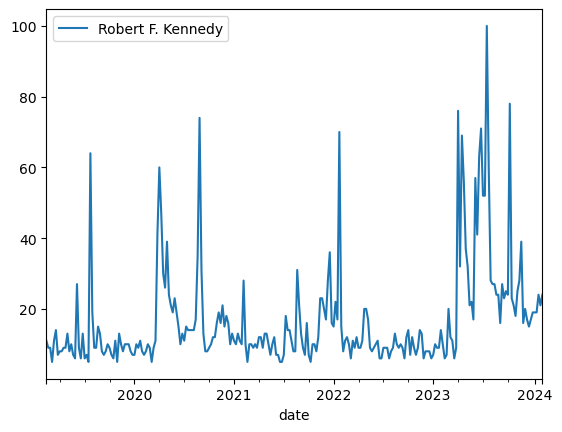

In [17]:
interest_over_time_df.plot()

## How did the report on Biden's memory change anything?

In [18]:
#Again we can look at google trends to see if there was an uptick in search for Joe Biden's age and the special counsel report


time.sleep(60)

pytrends = TrendReq(hl='en-US', tz=360)

kw_list = ['Joe Biden age']

pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m', geo='', gprop='')

biden_over_time_df = pytrends.interest_over_time()

data  = pytrends.related_queries()




<Axes: xlabel='date'>

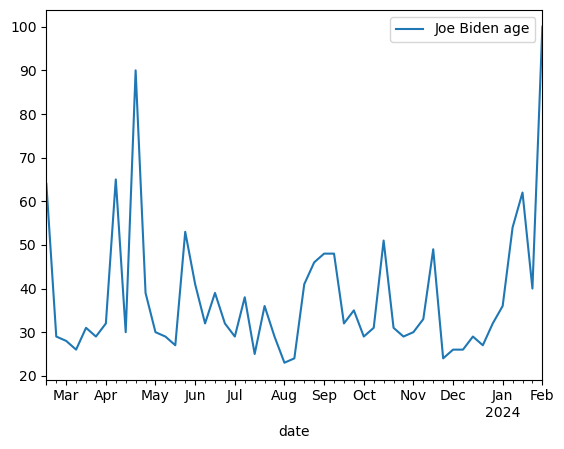

In [20]:
biden_over_time_df.plot()

In [19]:
print(data["Joe Biden age"]["top"])
data["Joe Biden age"]["rising"]

                      query  value
0                     trump    100
1                 age trump     99
2          age donald trump     52
3              donald trump     52
4          age of joe biden     51
5           president biden     48
6                 president     48
7       president joe biden     47
8   president joe biden age     47
9     what age is joe biden     24
10        how old joe biden     24
11                    obama     20
12                obama age     20
13     how old is joe biden     19
14         how old is biden     19
15      joe biden net worth     14
16           joe biden wife     13
17       joe biden wife age     13
18           joe biden 2024     13
19               jill biden     12
20           jill biden age     12
21          president trump     12
22             age of trump     11
23         age de joe biden      9
24             barack obama      9


,query,value
0,robert kennedy jr,32100
1,ramaswamy,28850
2,vivek ramaswamy,28200
3,vivek ramaswamy age,27050
4,robert f kennedy jr,19150
5,rfk jr,15300
6,marianne williamson,13600
7,michael d higgins age,12250
8,michael d higgins,12200
9,democratic candidates 2024,11450
